In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
os.chdir('C:\\Users\\Manoj\\Desktop\\Edureka_Python')

In [2]:
data= pd.read_csv("prisoners.csv")
data.head()

,STATE/UT,YEAR,No. of Inmates benefitted by Elementary Education,No. of Inmates benefitted by Adult Education,No. of Inmates benefitted by Higher Education,No. of Inmates benefitted by Computer Course
0,Andhra Pradesh,2013,9480,13758,672,170
1,Arunachal Pradesh,2013,0,0,0,0
2,Assam,2013,676,750,14,30
3,Bihar,2013,1693,3013,125,1417
4,Chhatisgarh,2013,1664,1803,192,103


In [3]:
data.tail()

,STATE/UT,YEAR,No. of Inmates benefitted by Elementary Education,No. of Inmates benefitted by Adult Education,No. of Inmates benefitted by Higher Education,No. of Inmates benefitted by Computer Course
30,D & N Haveli,2013,0,0,0,0
31,Daman & Diu,2013,0,0,0,0
32,Delhi,2013,1458,1187,908,174
33,Lakshadweep,2013,0,0,0,0
34,Pondicherry,2013,0,0,0,0


In [14]:
data.columns

Index(['STATE/UT', 'YEAR', 'No. of Inmates benefitted by Elementary Education',
       'No. of Inmates benefitted by Adult Education',
       'No. of Inmates benefitted by Higher Education',
       'No. of Inmates benefitted by Computer Course'],
      dtype='object')

In [8]:
help(data.describe)

Help on method describe in module pandas.core.generic:

describe(percentiles=None, include=None, exclude=None) method of pandas.core.frame.DataFrame instance
    Generates descriptive statistics that summarize the central tendency,
    dispersion and shape of a dataset's distribution, excluding
    ``NaN`` values.
    
    Analyzes both numeric and object series, as well
    as ``DataFrame`` column sets of mixed data types. The output
    will vary depending on what is provided. Refer to the notes
    below for more detail.
    
    Parameters
    ----------
    percentiles : list-like of numbers, optional
        The percentiles to include in the output. All should
        fall between 0 and 1. The default is
        ``[.25, .5, .75]``, which returns the 25th, 50th, and
        75th percentiles.
    include : 'all', list-like of dtypes or None (default), optional
        A white list of data types to include in the result. Ignored
        for ``Series``. Here are the options:
    
   

************data['STATE/UT'][(data['No. of Inmates benefitted by Elementary Education']==0) and (data['No. of Inmates benefitted by Adult Education']==0) and 
    (data['No. of Inmates benefitted by Higher Education']==0) and (data['No. of Inmates benefitted by Computer Course']==0)]
 
 list the  states that have all zeroes 

In [43]:
print(data['STATE/UT'].loc[data['No. of Inmates benefitted by Elementary Education']==0])
print(len(data.loc[data['No. of Inmates benefitted by Elementary Education']==0]))
print('#####################################')
print(data['STATE/UT'].loc[data['No. of Inmates benefitted by Adult Education']==0])
print(len(data.loc[data['No. of Inmates benefitted by Adult Education']==0]))
print('#####################################')
print(data['STATE/UT'].loc[data['No. of Inmates benefitted by Higher Education']==0])
print(len(data.loc[data['No. of Inmates benefitted by Higher Education']==0]))
print('#####################################')
print(data['STATE/UT'].loc[data['No. of Inmates benefitted by Computer Course']==0])
print(len(data.loc[data['No. of Inmates benefitted by Computer Course']==0]))

1     Arunachal Pradesh
15              Manipur
17              Mizoram
18             Nagaland
22               Sikkim
29           Chandigarh
30         D & N Haveli
31          Daman & Diu
33          Lakshadweep
34          Pondicherry
Name: STATE/UT, dtype: object
10
#####################################
1     Arunachal Pradesh
5                   Goa
15              Manipur
18             Nagaland
22               Sikkim
30         D & N Haveli
31          Daman & Diu
33          Lakshadweep
34          Pondicherry
Name: STATE/UT, dtype: object
9
#####################################
1     Arunachal Pradesh
15              Manipur
16            Meghalaya
18             Nagaland
22               Sikkim
30         D & N Haveli
31          Daman & Diu
33          Lakshadweep
34          Pondicherry
Name: STATE/UT, dtype: object
9
#####################################
1     Arunachal Pradesh
8      Himachal Pradesh
15              Manipur
16            Meghalaya
17              Mizor

In [44]:
data['Total Benefitted'] = data.iloc[:,2:6].sum(axis=1)
data.head()

,STATE/UT,YEAR,No. of Inmates benefitted by Elementary Education,No. of Inmates benefitted by Adult Education,No. of Inmates benefitted by Higher Education,No. of Inmates benefitted by Computer Course,Total Benefitted
0,Andhra Pradesh,2013,9480,13758,672,170,24080
1,Arunachal Pradesh,2013,0,0,0,0,0
2,Assam,2013,676,750,14,30,1470
3,Bihar,2013,1693,3013,125,1417,6248
4,Chhatisgarh,2013,1664,1803,192,103,3762


In [48]:
new = data.groupby(['STATE/UT'])[['No. of Inmates benefitted by Elementary Education','No. of Inmates benefitted by Adult Education','No. of Inmates benefitted by Higher Education','No. of Inmates benefitted by Computer Course']].sum()
new

,No. of Inmates benefitted by Elementary Education,No. of Inmates benefitted by Adult Education,No. of Inmates benefitted by Higher Education,No. of Inmates benefitted by Computer Course
STATE/UT,,,,
A & N Islands,167,45,11,0
Andhra Pradesh,9480,13758,672,170
Arunachal Pradesh,0,0,0,0
Assam,676,750,14,30
Bihar,1693,3013,125,1417
Chandigarh,0,265,85,0
Chhatisgarh,1664,1803,192,103
D & N Haveli,0,0,0,0
Daman & Diu,0,0,0,0


Make a bar plot with each state name on the x -axis and their total benefitted inmates as their bar heights. Which state has the maximum number of beneficiaries?

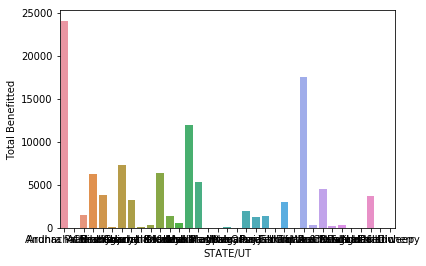

In [54]:
sns.barplot(x = data['STATE/UT'], y = data['Total Benefitted'], data = data)


In [51]:
help(sns.barplot)

Help on function barplot in module seaborn.categorical:

barplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, estimator=<function mean at 0x0000009C1B191D90>, ci=95, n_boot=1000, units=None, orient=None, color=None, palette=None, saturation=0.75, errcolor='.26', errwidth=None, capsize=None, dodge=True, ax=None, **kwargs)
    Show point estimates and confidence intervals as rectangular bars.
    
    A bar plot represents an estimate of central tendency for a numeric
    variable with the height of each rectangle and provides some indication of
    the uncertainty around that estimate using error bars. Bar plots include 0
    in the quantitative axis range, and they are a good choice when 0 is a
    meaningful value for the quantitative variable, and you want to make
    comparisons against it.
    
    For datasets where 0 is not a meaningful value, a point plot will allow you
    to focus on differences between levels of one or more categorical
    variables.
    


In [56]:
x=data.loc[:,['STATE/UT']]
y=data.iloc[:,2:6].sum(axis=1)
x2=np.array(x)
y2=np.array(y)
x3=list(x2)
y3=list(y2)


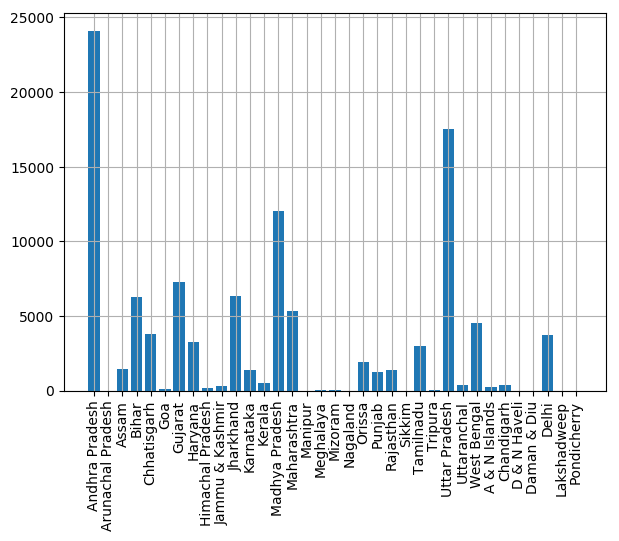

<Figure size 432x288 with 0 Axes>

In [80]:
plt.figure(num=None, figsize=(7, 5), dpi=100)
plt.bar(data['STATE/UT'],data['Total Benefitted'])
plt.xticks(range(len(data['Total Benefitted'])), data['STATE/UT'], rotation=90)
plt.grid()
plt.show()
plt.tight_layout()